In [114]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt


In [115]:
credit_card = pd.read_csv(r"C:\Users\ezeab\Downloads\archive (2)\Credit card transactions - India - Simple.csv", index_col=0, parse_dates=['Date'])
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   City       26052 non-null  object        
 1   Date       26052 non-null  datetime64[ns]
 2   Card Type  26052 non-null  object        
 3   Exp Type   26052 non-null  object        
 4   Gender     26052 non-null  object        
 5   Amount     26052 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.4+ MB


cleaning the data by changing date column to date format(dd-mm-yy) and then making the column a date time object(datetime64[ns]),then dropping the word india from all rows in the city column 

In [116]:
# changing date column format. this was already done by parsing date when importing the csv
credit_card['Date'] = pd.to_datetime(credit_card['Date'])
credit_card['Date'] = credit_card['Date'].dt.strftime("%d-%m-%y")
# converting date column to datetime64 object
credit_card['Date'] = credit_card['Date'].astype('datetime64[ns]')
# stripping 'india' from city names 
credit_card['City'] = credit_card['City'].str.replace(', India', '')
# checking for missing values
print(credit_card.isna().sum())

City         0
Date         0
Card Type    0
Exp Type     0
Gender       0
Amount       0
dtype: int64


In [117]:
print(credit_card.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   City       26052 non-null  object        
 1   Date       26052 non-null  datetime64[ns]
 2   Card Type  26052 non-null  object        
 3   Exp Type   26052 non-null  object        
 4   Gender     26052 non-null  object        
 5   Amount     26052 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.4+ MB
None


In [119]:
credits_sample = credit_card.groupby('Gender').sample(n=21, random_state=234)
credit_card.value_counts(normalize=True)

City       Date        Card Type  Exp Type       Gender  Amount
Achalpur   2013-06-12  Silver     Grocery        F       201032    0.000038
Jaipur     2015-02-17  Signature  Entertainment  F       273788    0.000038
           2015-02-23  Signature  Bills          F       50887     0.000038
           2015-02-22  Platinum   Fuel           F       35071     0.000038
           2015-02-21  Gold       Fuel           M       45909     0.000038
                                                                     ...   
Delhi      2013-09-11  Gold       Grocery        M       153338    0.000038
                                  Fuel           F       48795     0.000038
           2013-09-10  Silver     Grocery        F       162859    0.000038
                                  Fuel           F       39439     0.000038
Zunheboto  2014-03-29  Silver     Grocery        M       298567    0.000038
Length: 26052, dtype: float64

In [139]:
#grouping and comparing the total speendings across the years
#still needs futher fixing, tryin to do it as year something not all dates
yealy_spends = credit_card.groupby('Date')['Amount'].agg([np.mean, sum])
yealy_spends.sort_index()

,mean,sum
Date,,
2013-01-11,166866.729730,6174069
2013-01-12,149688.950000,5987558
2013-02-11,150273.487179,5860666
2013-02-12,172830.019608,8814331
2013-03-11,162591.447368,6178475
...,...,...
2015-12-01,174969.483333,10498169
2015-12-02,163665.046512,7037597
2015-12-03,164994.981132,8744734


In [ ]:
#groupby card type and plot based on total amount spent
cards_grouped = credit_card.groupby(['Card Type', 'Gender'])['Amount'].sum()
cards_grouped

Card Type  Gender
Gold       F         522932183
           M         461607353
Platinum   F         531940229
           M         475698790
Signature  F         548005149
           M         465035956
Silver     F         602433469
           M         467180244
Name: Amount, dtype: int64

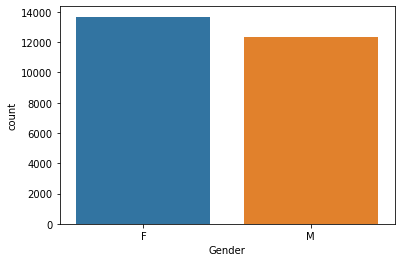

In [128]:
sns.countplot(x='Gender', data=credit_card)
plt.show()

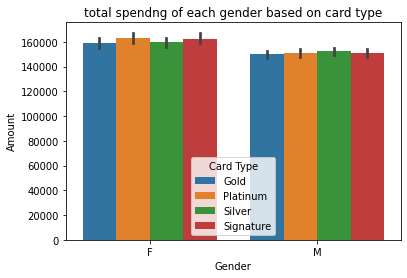

In [ ]:
sns.barplot(x='Gender', y='Amount', data=credit_card, hue='Card Type')
plt.title('total spendng of each gender based on card type')
plt.show()

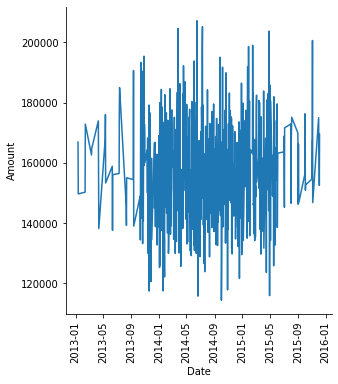

In [ ]:
sns.relplot(x='Date', y='Amount', data=credit_card, kind='line', errorbar=None)
plt.xticks(rotation=90)
plt.show()


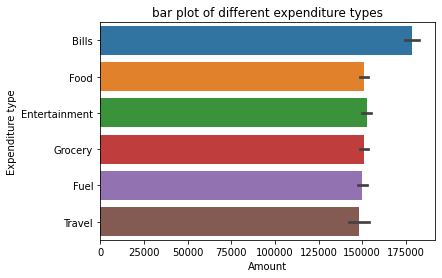

In [127]:
sns.barplot(y='Exp Type', x='Amount', data=credit_card)
plt.title("bar plot of different expenditure types")
plt.ylabel("Expenditure type")
plt.show()